<a href="https://colab.research.google.com/github/SwamySriharsha/JavaPrograms/blob/master/June_27_KNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [184]:
!ls

iris.data  sample_data


In [0]:
df = pd.read_csv('iris.data', header=None, names=['sl','sw','pl','pw','class'])

In [186]:
df.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [187]:
df.shape

(150, 5)

In [188]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

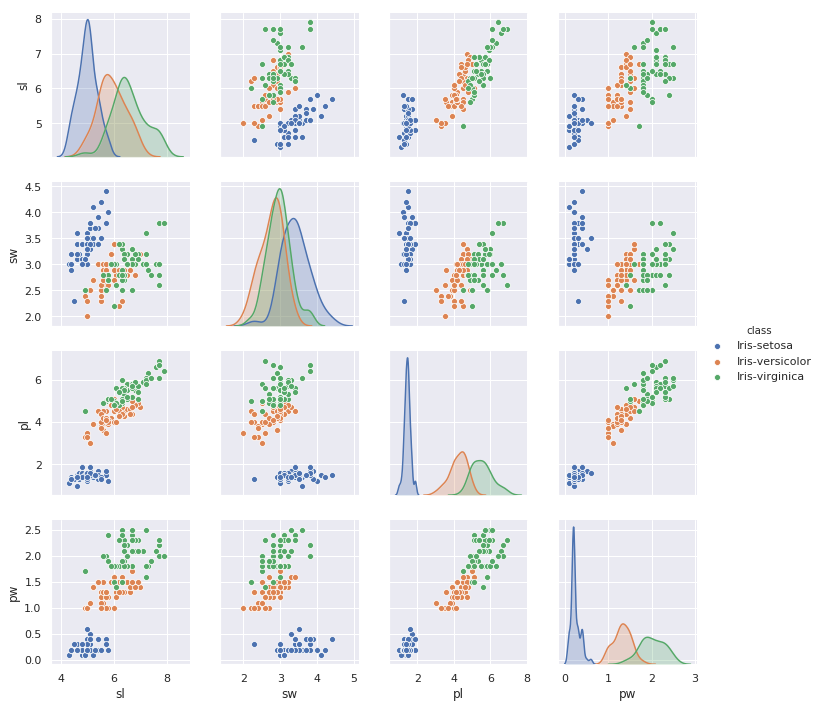

In [189]:
#plot data
sns.set(style='darkgrid')
sns.pairplot(data=df, hue='class', kind='scatter')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
y = df['class']
X = df.drop(['class'], axis=1)

In [192]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [194]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [196]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 4) (100,)
(50, 4) (50,)


[**Sklearn**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
---
<h3>class <em>sklearn.neighbors.</em> KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)</h3>

In [197]:
%time
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5, algorithm='brute', leaf_size=None)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)
print(y_pred)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.58 µs
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


In [198]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.98

<h3>My Own</h3>

In [0]:
class KNN:
  
  '''KNearest Neighbours'''
  
  def __init__(self, n_neighbors, algorithm='brute', metric='minkowski', p=2):
    print("Object has been created")
    self.n_neighbors = n_neighbors
    self.algorithm = algorithm
    self.metric = metric
    self.p = p
  
  def minkowski(self, xq, point): #xq and point are: numpy.ndarray
    a = np.power((xq-point), self.p)
    return math.sqrt(np.sum(a))
    
    
  def fit(self, X_train, y_train):
    self.X_train = X_train.values #dataframe
    self.y_train = y_train #series
    
  def predict(self, X_test):
    self.X_test = X_test.values
    y_pred = []
    for ptest in self.X_test: #each pt is numpy.ndarray
      knn = {}
      for ptrain,tlabel in zip(self.X_train, self.y_train):
        dist = self.minkowski(ptest, ptrain)
        knn[dist] = tlabel
      #print(knn)
      keys = sorted(knn)
      #print(keys)
      mvotes = {}
      for k in keys[:self.n_neighbors]:
        if knn[k] in mvotes:
          mvotes[knn[k]] += 1
        else:
          mvotes[knn[k]] = 1
      #print(mvotes)
      v=list(mvotes.values())
      k=list(mvotes.keys())
      pl = k[v.index(max(v))]
      y_pred.append(pl)
    return y_pred

In [200]:
%time
clf = KNN(n_neighbors=5)
clf.fit(X_train, y_train)
y_predmy = clf.predict(X_test)
print(y_predmy)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.58 µs
Object has been created
[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2]


In [201]:
accuracy_score(y_test, y_predmy)

0.98